In [6]:
# 本代码构建了LeNet-5卷积神经网络，并使用MNIST数据集进行训练完成手写数字识别任务

In [5]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import matplotlib.pyplot as plt

In [6]:
# 运算设备设置为显卡
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [8]:
# 下载MNIST数据集，输入调整为28×28
training_set = torchvision.datasets.MNIST('dataset', 
                                          train=True, 
                                          transform=torchvision.transforms.ToTensor(), 
                                          download=True)
test_set = torchvision.datasets.MNIST('dataset', 
                                      train=False, 
                                      transform=torchvision.transforms.ToTensor(),
                                      download=True)

In [14]:
# 设置批次大小
BATCH_SIZE= 256

In [15]:
# 加载训练集和测试集
train_loader = data.DataLoader(training_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_set, batch_size=BATCH_SIZE)

In [16]:
# 自定义最小池化层
class MinPool2d(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        super(MinPool2d, self).__init__()
        self.kernel_size = kernel_size
        self.stride = stride or kernel_size
        self.padding = padding
    def forward(self, x):
        return -nn.functional.max_pool2d(-x,kernel_size=self.kernel_size, stride=self.stride, padding=self.padding)
        

In [2]:
# 定义LeNet-5模型，允许选择不同的池化方式
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        
        # 定义第一层卷积层：输入通道1，输出通道6，卷积核5x5，输出大小变为28x28x6
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0)
        
        # 定义不同的池化层
        
        #最大池化层
        # self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        #平均池化层
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        #最小池化层
        # self.pool1 = MinPool2d(kernel_size=2, stride=2)
        # self.pool2 = MinPool2d(kernel_size=2, stride=2)

        # 第二层卷积：输入通道6，输出通道16，卷积核5x5，输出大小变为8x8x16
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        
        # 全连接层：输入尺寸为5x5x16（经过第二次池化后）
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        # 定义前向传播函数
    def forward(self, x):
            
        # 第一层卷积 + 池化
        x = self.pool1(torch.relu(self.conv1(x)))
            
        # 第二层卷积 + 池化
        x = self.pool2(torch.relu(self.conv2(x)))
            
        # 展平为一维向量
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

NameError: name 'nn' is not defined

In [39]:
# 构建模型
model = LeNet5()

In [40]:
# 将模型交给设备计算
model.to(device)
print(model)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [41]:
# 设定损失函数
loss_func = nn.CrossEntropyLoss()
# 设定学习率
lr = 0.01
# 设定优化方法(Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [42]:
# 设定训练轮次
EPOCH = 10
# 记录训练准确度的历史
train_acc_history = []

In [43]:
# 模型训练
for epoch in range(EPOCH):
    training_loss = 0.0
    training_acc = 0.0

    model.train()
    for batch, (X, y) in enumerate(train_loader):
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_func(pred, y)

        # 清除梯度，否则会将每一个batch的梯度累加
        optimizer.zero_grad()
        # 反向传播(计算梯度)
        loss.backward()
        # 更新位置参数的值
        optimizer.step()

        training_loss += loss.item()
        training_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
    training_acc /= len(train_loader.dataset)
    training_loss /= len(train_loader)

    train_acc_history.append(training_acc)  # 记录训练准确度
    print(f'Epoch {epoch + 1}: training accuracy: {training_acc:4f}, training loss: {training_loss:4f}')

Epoch 1: training accuracy: 0.904667, training loss: 0.294489
Epoch 2: training accuracy: 0.977383, training loss: 0.074682
Epoch 3: training accuracy: 0.982283, training loss: 0.058578
Epoch 4: training accuracy: 0.985450, training loss: 0.046396
Epoch 5: training accuracy: 0.987667, training loss: 0.039959
Epoch 6: training accuracy: 0.988383, training loss: 0.037404
Epoch 7: training accuracy: 0.989733, training loss: 0.032043
Epoch 8: training accuracy: 0.989867, training loss: 0.031727
Epoch 9: training accuracy: 0.991283, training loss: 0.027408
Epoch 10: training accuracy: 0.991833, training loss: 0.025667


test accuracy: 0.981800, test loss: 0.058491


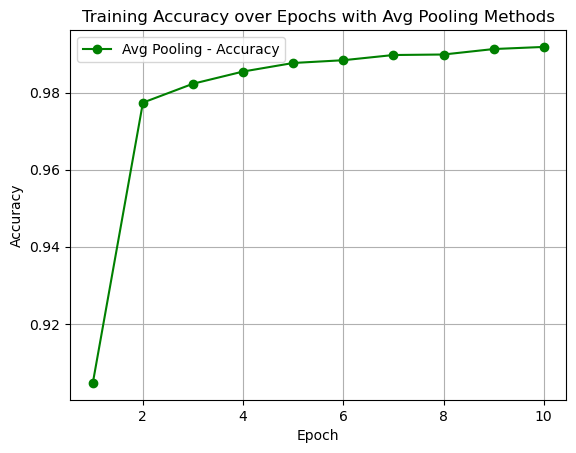

In [44]:
# 模型测试
test_loss = 0.0
test_acc = 0.0
for batch, (X, y) in enumerate(test_loader):
    X = X.to(device)
    y = y.to(device)
    pred = model(X)
    loss = loss_func(pred, y)
    test_loss += loss.item()
    test_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
test_acc /= len(test_loader.dataset)
test_loss /= len(test_loader)
print(f'test accuracy: {test_acc:4f}', end=', ')
print(f'test loss: {test_loss:4f}')

# 绘制训练准确度随轮次变化的图
# plt.plot(range(1, EPOCH+1), train_acc_history, marker='o', color='b', label='Max Pooling - Accuracy')
plt.plot(range(1, EPOCH+1), train_acc_history, marker='o', color='g', label='Avg Pooling - Accuracy')
# plt.plot(range(1, EPOCH+1), train_acc_history, marker='o', color='r', label='Min Pooling - Accuracy')

plt.title('Training Accuracy over Epochs with Avg Pooling Methods')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()